In [1]:
from package import thin_demo
import numpy as np
import cv2 as cv
import bezier
import os
import matplotlib.pyplot as plt
import pandas as pd 
import cv2 as cv
from skimage.morphology import thin, skeletonize
import numpy as np
import bezier
import pandas as pd
import matplotlib.pyplot as plt



{'018', '026', '042', '025', '003'}
img001-004-000


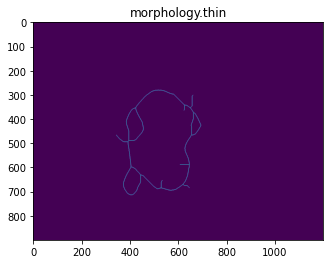

In [8]:
from package import thin_demo
from package import extractContours
from package import generateBezierCurve
import matplotlib.pyplot as plt
import cv2 as cv
import random
import os
import shutil


# delete and create a folder for outputs.
try:
    shutil.rmtree(os.path.join(os.getcwd(), "new_images"))
except FileNotFoundError as error: print("new_images/ folder doesn't exist")
os.mkdir(os.path.join(os.getcwd(), "new_images"))

selected = set()
for i in range(5):
   selected.add('{0:03}'.format(random.randint(1,55)))
print(selected)

path = 'archive/Img/'
for filename in os.listdir(path):
    name, extension = filename.split(".")
    category, index = name.split("-")
    if index not in selected: continue
    extension = "." + extension
    ##############
    name = 'img001-004-000'
    ##############
    print(name)
    # img = cv.imread(path + name + extension)
    img = cv.imread('/Users/henghong/Desktop/SSDA/SSDA/output_image_thick/img001-002-001.png')
    contours = thin_demo(img)
    f, ax = plt.subplots(1,1)
    ax.imshow(contours)
    ax.set_title('morphology.thin')
    plt.show()
    break